In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/Users/vikas/Desktop/MLC/MLC4/Mall_Customers.csv')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Genre = le.fit_transform(df.Genre)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [4]:
req_data = df.iloc[:,[3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


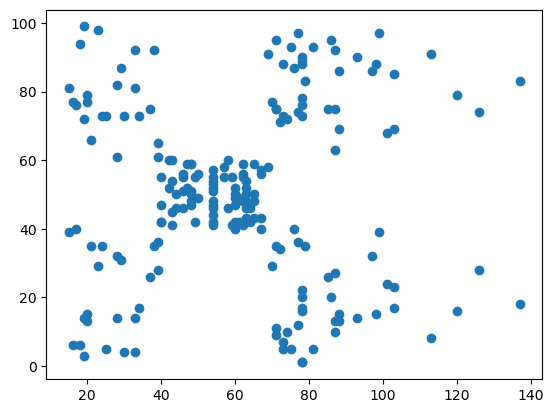

In [5]:
# Plotting the distribution of the customers based on two parameters
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [ ]:
# Determinig the number of clusters formed in the mapped data
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 3,init = 'k-means++',random_state = 100)
kmeans.fit_predict(req_data)

In [ ]:
wcss = []
for n in range (1,11):
    kmeans = KMeans ( n_clusters = n, init = 'k-means++', random_state = 100)
    kmeans.fit_predict(req_data)
    wcss.append(kmeans.inertia_)

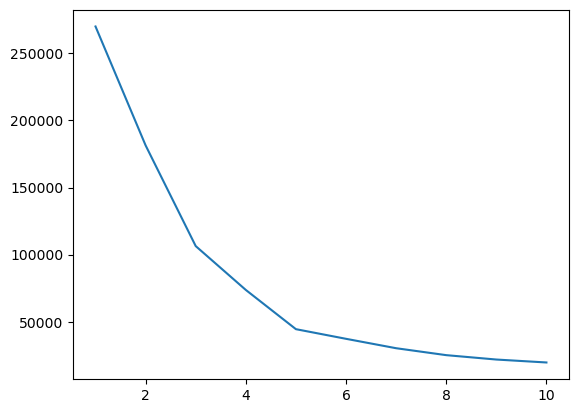

In [8]:
plt.plot(range(1,11),wcss)
plt.show()

In [9]:
# Considering the lowest elbow as the number of clusters formed 
kmeans = KMeans (n_clusters = 5,init = 'k-means++',random_state = 100)
kmeans.fit_predict(req_data)

/Users/vikas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [10]:
# Fitting the cluster data into features
yc = kmeans.fit_predict(req_data)

/Users/vikas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
req_data["cluster"] = yc

/var/folders/1w/w0yr_jt91l979gr2gshr8rp80000gn/T/ipykernel_66594/249562868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data["cluster"] = yc


In [13]:
req_data.cluster.value_counts()

2    81
0    39
3    35
1    23
4    22
Name: cluster, dtype: int64

In [14]:
## Marking down each of the cluster formed
c1 = req_data[req_data.cluster == 0]
c2 = req_data[req_data.cluster == 1]
c3 = req_data[req_data.cluster == 2]
c4 = req_data[req_data.cluster == 3]
c5 = req_data[req_data.cluster == 4]

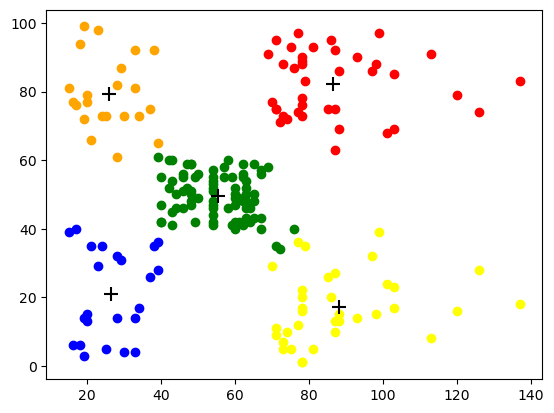

In [15]:
## Differentiating each of the cluster values with label and color
## Adding a colorbar for the clusters
plt.scatter(c1["Annual Income (k$)"],
            c1["Spending Score (1-100)"],c="red",label ="cluster_1")
plt.scatter(c2["Annual Income (k$)"],
            c2["Spending Score (1-100)"],c="blue",label = "cluster_2")
plt.scatter(c3["Annual Income (k$)"],
            c3["Spending Score (1-100)"],c="green",label="cluster_3")
plt.scatter(c4["Annual Income (k$)"],
            c4["Spending Score (1-100)"],c="yellow",label="cluster_4")
plt.scatter(c5["Annual Income (k$)"],
            c5["Spending Score (1-100)"],c="orange",label="cluster_5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black",s =100,marker="+")

In [17]:
imp_data = df.iloc[:,[1,2,3,4]]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


/var/folders/1w/w0yr_jt91l979gr2gshr8rp80000gn/T/ipykernel_66594/1860206957.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(imp_data["Age"], imp_data["Annual Income (k$)"], imp_data["Spending Score (1-100)"],cmap='viridis')


Text(0.5, 0.92, '3D Scatter Plot')

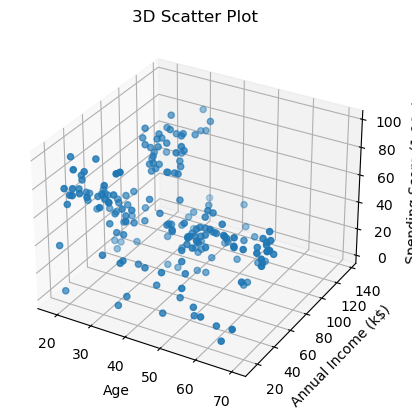

In [18]:
##plotting the distribution of the customers based on three parameters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(imp_data["Age"], imp_data["Annual Income (k$)"], imp_data["Spending Score (1-100)"],cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot')

In [ ]:
wcss = []
for n in range (1,11):
    kmeans = KMeans ( n_clusters = n, init = 'k-means++', random_state = 100)
    kmeans.fit_predict(imp_data)
    wcss.append(kmeans.inertia_)

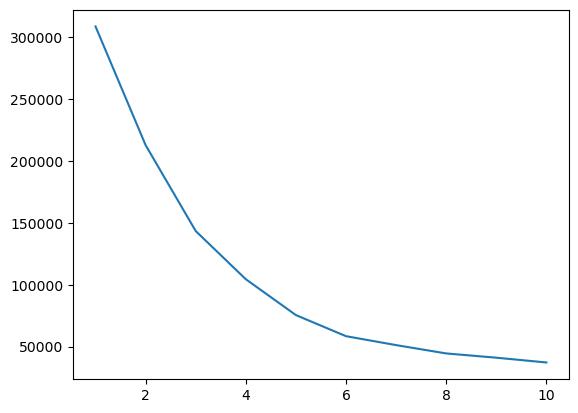

In [20]:
##finding out the number of clusters 
plt.plot(range(1,11),wcss)
plt.show()

In [21]:
kmeans = KMeans (n_clusters = 6,init = 'k-means++',random_state = 100)
kmeans.fit_predict(imp_data)

/Users/vikas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 5,
       0, 2, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 4, 5, 4, 3, 4, 3, 4, 3, 4,
       5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [22]:
ym = kmeans.fit_predict(imp_data)

/Users/vikas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


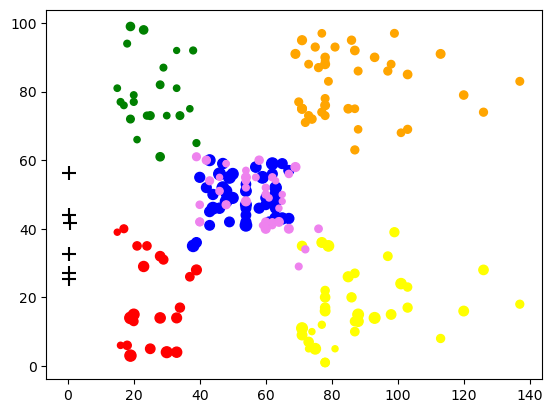

In [31]:
##mapping in 2-D format 
p1 = imp_data[imp_data.cluster == 0]
p2 = imp_data[imp_data.cluster == 1]
p3 = imp_data[imp_data.cluster == 2]
p4 = imp_data[imp_data.cluster == 3]
p5 = imp_data[imp_data.cluster == 4]
p6 = imp_data[imp_data.cluster == 5]
p7 = imp_data[imp_data.cluster == 6]
p8 = imp_data[imp_data.cluster == 7]
plt.scatter(p1["Annual Income (k$)"],
            p1["Spending Score (1-100)"],p1["Age"],c="red",label ="cluster_1")
plt.scatter(p2["Annual Income (k$)"],
            p2["Spending Score (1-100)"],p2["Age"],c="blue",label = "cluster_2")
plt.scatter(p3["Annual Income (k$)"],
            p3["Spending Score (1-100)"],p3["Age"],c="green",label="cluster_3")
plt.scatter(p4["Annual Income (k$)"],
            p4["Spending Score (1-100)"],p4["Age"],c="yellow",label="cluster_4")
plt.scatter(p5["Annual Income (k$)"],
            p5["Spending Score (1-100)"],p5["Age"],c="orange",label="cluster_5")
plt.scatter(p6["Annual Income (k$)"],
            p6["Spending Score (1-100)"],p6["Age"],c="violet",label="cluster_6")


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black",s =100,marker="+")

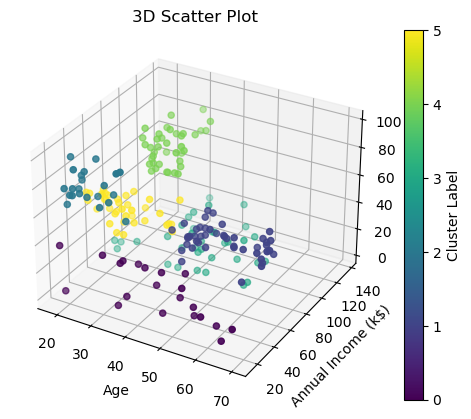

In [37]:
# Assuming you have performed clustering and stored the cluster labels in a variable called 'cluster_labels'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(imp_data["Age"], imp_data["Annual Income (k$)"], imp_data["Spending Score (1-100)"],
                     c=ym, cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot')

# Adding a colorbar for the clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.show()